통계적 사고 (2판) 연습문제 ([thinkstats2.com](thinkstats2.com), [think-stat.xwmooc.org](http://think-stat.xwmooc.org))<br>
Allen Downey / 이광춘(xwMOOC)

In [1]:
%matplotlib inline
from __future__ import print_function, division

import numpy as np
import random

import first
import normal
import thinkstats2
import thinkplot

## 연습문제 14.1

5.4 절에서, 성인 체중분포는 근사적으로 로그정규분포임을 알아냈다.
한가지 가능한 설명은 매년 성인이 느는 체중은 현재 체중에 비례한다는 것이다.
이런 경우, 성인 체중은 많은 숫자의 복잡한 요인의 곱이 된다:


$ w = w_0 f_1 f_2 ... f_n$


여기서, $w$는 성인체중, $w_0$는 출생체중,
$f_i$는 $i$ 년도에 대한 체중 증가 요인이다.


곱에 대해 로그를 취하면, 요인에 로그를 취한 합으로 바뀐다:

$log w = log w_0 + log f_1 + log f_2 + ... + log f_n$


그래서, 중심극한정리에 의해서, 
$\log w$의 분포는 근사적으로 큰 $n$에 대해 근사적으로 정규분포가 된다.
이는 $w$의 분포가 로그정규분포라는 것을 함의를 갖는다.

이런 현상을 모형화하는데, $f$에 대한 일리있어 보이는 분포를 고르고 나서,
출생체중 분포로 부터 난수를 고르고, $f$ 분포로부터 요인 시퀀스를 고르고,
곱을 계산함으로써 성인체중 표본을 생성한다.
로그정규 분포로 수렴하는데 $n$ 값이 얼마나 필요할까?


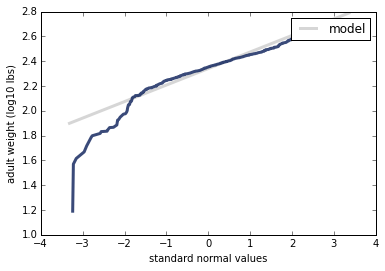

In [3]:
def GenerateAdultWeight(birth_weights, n):
    """Generate a random adult weight by simulating annual gain.

    birth_weights: sequence of birth weights in lbs
    n: number of years to simulate

    returns: adult weight in lbs
    """
    bw = random.choice(birth_weights)
    factors = np.random.normal(1.09, 0.03, n)
    aw = bw * np.prod(factors)
    return aw


def PlotAdultWeights(live):
    """Makes a normal probability plot of log10 adult weight.

    live: DataFrame of live births

    """
    birth_weights = live.totalwgt_lb.dropna().values
    aws = [GenerateAdultWeight(birth_weights, 40) for _ in range(1000)]
    log_aws = np.log10(aws)
    thinkstats2.NormalProbabilityPlot(log_aws)
    thinkplot.Show(xlabel='standard normal values',
                   ylabel='adult weight (log10 lbs)')

thinkstats2.RandomSeed(17)


live, firsts, others = first.MakeFrames()
PlotAdultWeights(live)

$n=40$ 표본을 갖는 분포가 가장 작은 체중에 대해서 제외하고 근사적으로 로그정규분포를 따른다.

실제 분포는 로그정규분포에서 벗어나는데 이유는 다른 연령에 사람과 섞여있고, 매년 증가하는 체중에 상관관계가 있기 때문이다.

## 연습문제 14.2 

14.6절에서, 중심극한정리를 사용해서 
동일 모집단에서 양쪽 표본이 추출되었다는 귀무가설 아래,
평균간에 차이, $\delta$, 표집분포를 알아냈다.

이 분포를 사용해서 추정값 표준오차와 신뢰구간도 알아낼 수 있다.
하지만, 이 방식은 근사적으로 맞다.
좀더 정확성을 기하기 위해서, 표본이 다른 모집단에서 추출되었다는
대립가설 아래 $\delta$ 표집분포를 계산해야 된다.

이 분포를 계산하고, 이를 사용해서 평균 사이 차이에 대한 
표준오차와 90% 신뢰구간을 계산하시오.

prglngth example
0.0780372667775
null hypothesis N(0, 0.00319708)
0.0837707042554 0.0837707042554
estimated params N(0.0780373, 0.00321144)
-0.0151758158699 0.171250349425


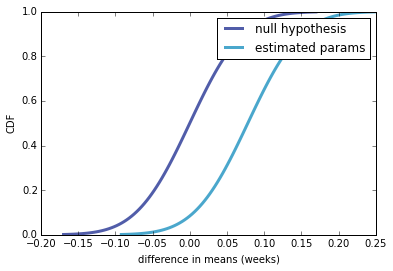

In [4]:
def PlotPregLengths(live, firsts, others):
    """Plots sampling distributions under the null and alternate hypotheses.
    live, firsts, others: DataFrames
    """
    print('prglngth example')
    delta = firsts.prglngth.mean() - others.prglngth.mean()
    print(delta)

    dist1 = normal.SamplingDistMean(live.prglngth, len(firsts))
    dist2 = normal.SamplingDistMean(live.prglngth, len(others))
    dist = dist1 - dist2
    print('null hypothesis', dist)
    print(dist.Prob(-delta), 1 - dist.Prob(delta))

    thinkplot.PrePlot(2)
    thinkplot.Plot(dist, label='null hypothesis')

    dist1 = normal.SamplingDistMean(firsts.prglngth, len(firsts))
    dist2 = normal.SamplingDistMean(others.prglngth, len(others))
    dist = dist1 - dist2
    print('estimated params', dist)
    print(dist.Percentile(5), dist.Percentile(95))

    thinkplot.Plot(dist, label='estimated params')
    thinkplot.Show(xlabel='difference in means (weeks)',
                   ylabel='CDF')

PlotPregLengths(live, firsts, others)    

귀무가설 아래 표집분포가 0을 중심으로 모여있다.

귀무가설아래 표집분포가 관측차이 0.078을 갖고 모여있다.

두 분포의 분산은 매우 유사하다.

## 연습문제 14.3 
최신 논문에서, 스타인과 동료들은 학생공학팀 안에서 성별 고정관념에 따른 작업 배정을 완화하려는 의도로 개입 효과를 조사했다.

개입 전과 후에 대해서, 학생들이 7점 척도로 학급 프로젝트 각 측면에 대한 기여도를 
평가하는 설문에 응답했다.

개입 전에는, 남자 학생이 여자 학생보다 프로젝트의 프로그래밍 측면에 대해서
더 높은 점수를 보고했다; 평균적으로 남자가 0.28 표준오차를 갖는 3.57
점수를 보고했다. 여자는 평균적으로 0.32 표준오차를 갖는 1.91을 보고했다.

성별 격차(평균에 있어 차이)에 대한 표집분포를 계산하고,
통계적으로 유의적인지 검정하라.
추정한 평균에 대한 표준오차만 주어졌기 때문에,
표집분포를 식별하는데 표본크기를 알 필요는 없다.

개입후에, 성별격차가 더 적어졌다:
남자에 대한 평균점수는 3.44 (표준오차 0.16); 여자에 대한 평균점수 3.18 (표준오차 0.16).
다시, 성별격차에 대한 표집분포를 계산하고 검정하라.

마지막으로 성별격차에 변화를 추정하라; 이 변화에 대한 표집분포는 무엇이고,
통계적으로 유의적인가?

In [6]:
def TestIntervention():
    """Tests whether reported changes are statistically significant.
    """
    male_before = normal.Normal(3.57, 0.28**2)
    male_after = normal.Normal(3.44, 0.16**2)

    female_before = normal.Normal(1.91, 0.32**2)
    female_after = normal.Normal(3.18, 0.16**2)

    diff_before = female_before - male_before
    print('mean, p-value', diff_before.mu, 1-diff_before.Prob(0))
    print('CI', diff_before.Percentile(5), diff_before.Percentile(95))
    print('stderr', diff_before.sigma)

    diff_after = female_after - male_after
    print('mean, p-value', diff_after.mu, 1-diff_after.Prob(0))
    print('CI', diff_after.Percentile(5), diff_after.Percentile(95))
    print('stderr', diff_after.sigma)

    diff = diff_after - diff_before
    print('mean, p-value', diff.mu, diff.Prob(0))
    print('CI', diff.Percentile(5), diff.Percentile(95))
    print('stderr', diff.sigma)

TestIntervention()

mean, p-value -1.66 4.73095323208e-05
CI -2.3594013558 -0.960598644196
stderr 0.425205832509
mean, p-value -0.26 0.125267987207
CI -0.632187889177 0.112187889177
stderr 0.22627416998
mean, p-value 1.4 0.00182694836898
CI 0.607733579312 2.19226642069
stderr 0.481663783152


1. 개입전 성별격차는 1.66 점 (p-값 5e-5)
1. 개입후 성별격차는 0.26 점 (p-값 유의적이지 않음)
1. 성별격차에 변화 1.4점 (p-값 0.002 유의적)